In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

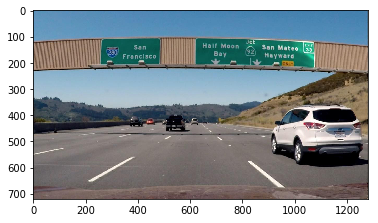

In [4]:
img = mpimg.imread('../data/signs_vehicles_xygrad.jpg')
plt.imshow(img)

In [5]:
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 2) Take the gradient in x and y separately
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    
    # 3) Calculate the magnitude 
    abs_sobel_xy = np.sqrt(sobel_x**2 + sobel_y**2)
    
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scale_factor = np.max(abs_sobel_xy)/255 
    scaled_sobel = (abs_sobel_xy/scale_factor).astype(np.uint8) 
    
    # 5) Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1
    
    return binary_output

In [6]:
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 2) Take the gradient in x and y separately
    # 3) Take the absolute value of the x and y gradients
    abs_sobel_x = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel ))
    abs_sobel_y = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel))
    
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    grad_dir = np.arctan2(abs_sobel_y, abs_sobel_x)
    
    # 5) Create a binary mask where direction thresholds are met
    binary_output = np.zeros_like(grad_dir)
    binary_output[(grad_dir >= thresh[0]) & (grad_dir <= thresh[1])] = 1
    
    return binary_output
    

In [71]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255), cvtColor=True):
    
    thresh_min, thresh_max = thresh
    
    x = 1 if orient == 'x' else 0
    y = 1 if orient == 'y' else 0
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) if cvtColor else img
    
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, x, y, ksize=sobel_kernel))
    
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    return binary_output

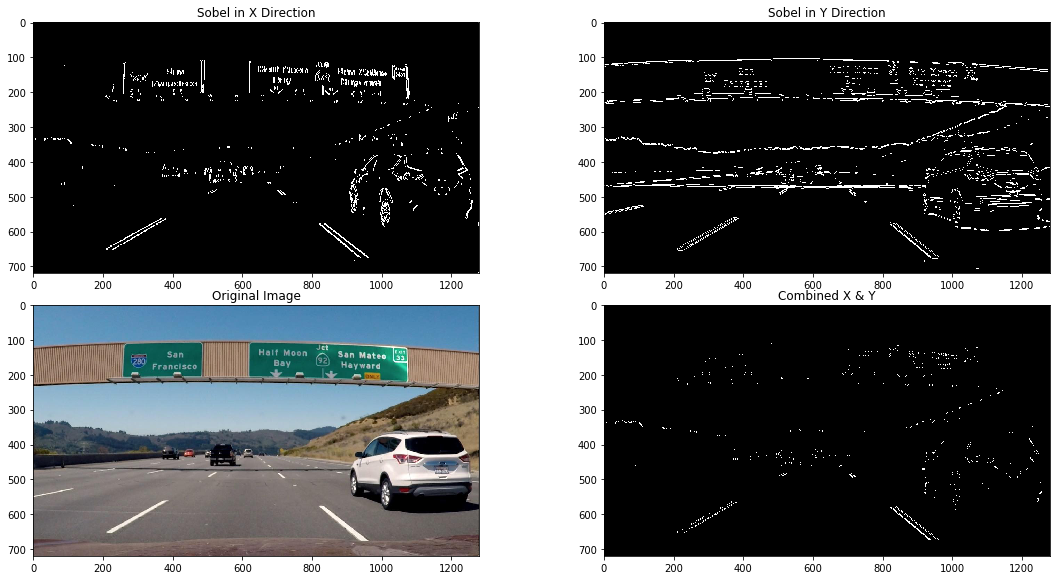

In [64]:
ksize = 11

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(img, orient='x', sobel_kernel=ksize, thresh=(45, 130))
grady = abs_sobel_thresh(img, orient='y', sobel_kernel=ksize, thresh=(50, 90))

# Combining X & Y Sobels
grad_combined = np.zeros_like(gradx)
grad_combined[(gradx==1) & (grady==1)] = 1

# Show images
f, (ax1, ax2) = plt.subplots(2, 2, figsize=(16, 8))
f.tight_layout()
ax1[0].imshow(gradx, cmap='gray')
ax1[0].set_title('Sobel in X Direction')
ax1[1].imshow(grady, cmap='gray')
ax1[1].set_title('Sobel in Y Direction')
ax2[0].imshow(img)
ax2[0].set_title('Original Image')
ax2[1].imshow(grad_combined, cmap='gray')
ax2[1].set_title('Combined X & Y')

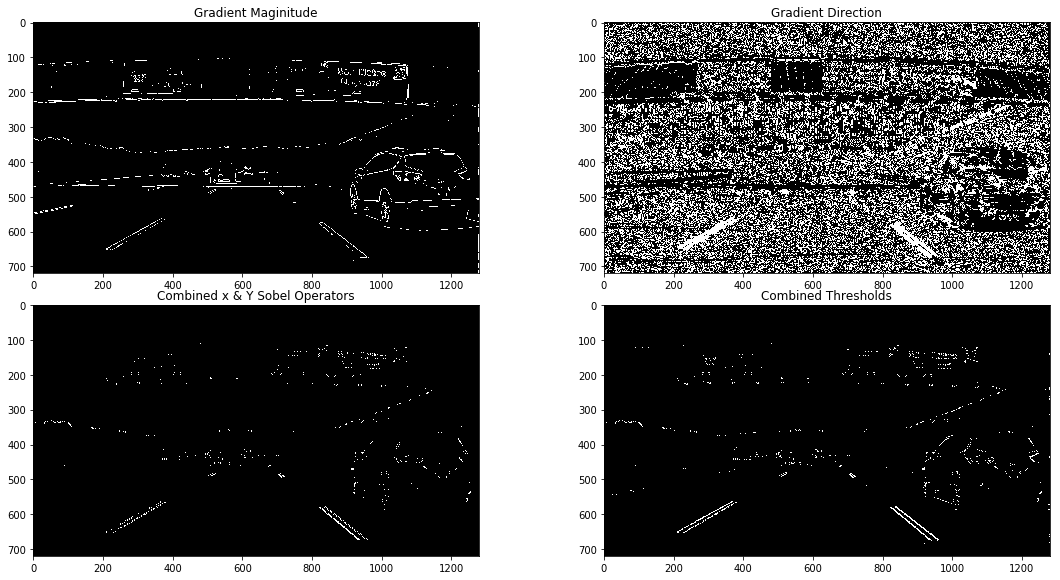

In [65]:
ksize = 15
mag_binary = mag_thresh(img, sobel_kernel=ksize, mag_thresh=(75, 150))
dir_binary = dir_threshold(img, sobel_kernel=ksize, thresh=(0.7, 1.3))


combined = np.zeros_like(dir_binary)
combined[(grad_combined==1) | (mag_binary==1) & (dir_binary==1)] = 1

f, (ax1, ax2) = plt.subplots(2, 2, figsize=(16, 8))
f.tight_layout()
ax1[0].imshow(mag_binary, cmap='gray')
ax1[0].set_title('Gradient Maginitude')
ax1[1].imshow(dir_binary, cmap='gray')
ax1[1].set_title('Gradient Direction')

ax2[0].imshow(grad_combined, cmap='gray')
ax2[0].set_title('Combined x & Y Sobel Operators')
ax2[1].imshow(combined, cmap='gray')
ax2[1].set_title('Combined Thresholds')


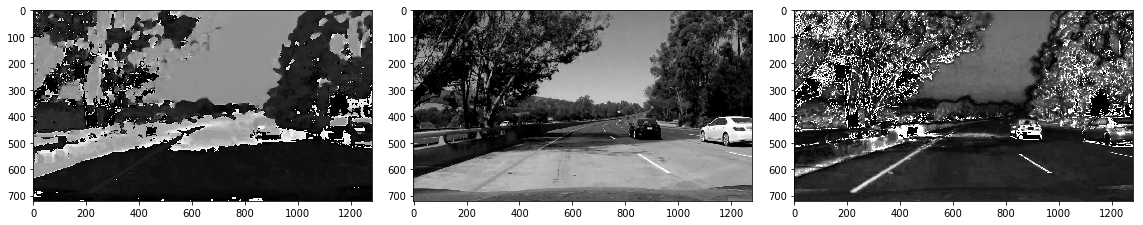

In [69]:
shadow_img = mpimg.imread('../data/color-shadow-example.jpg')
shadow_img_hls = cv2.cvtColor(shadow_img, cv2.COLOR_RGB2HLS)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 8))
f.tight_layout()
ax1.imshow(shadow_img_hls[:,:,0], cmap='gray')
ax2.imshow(shadow_img_hls[:,:,1], cmap='gray')
ax3.imshow(shadow_img_hls[:,:,2], cmap='gray')


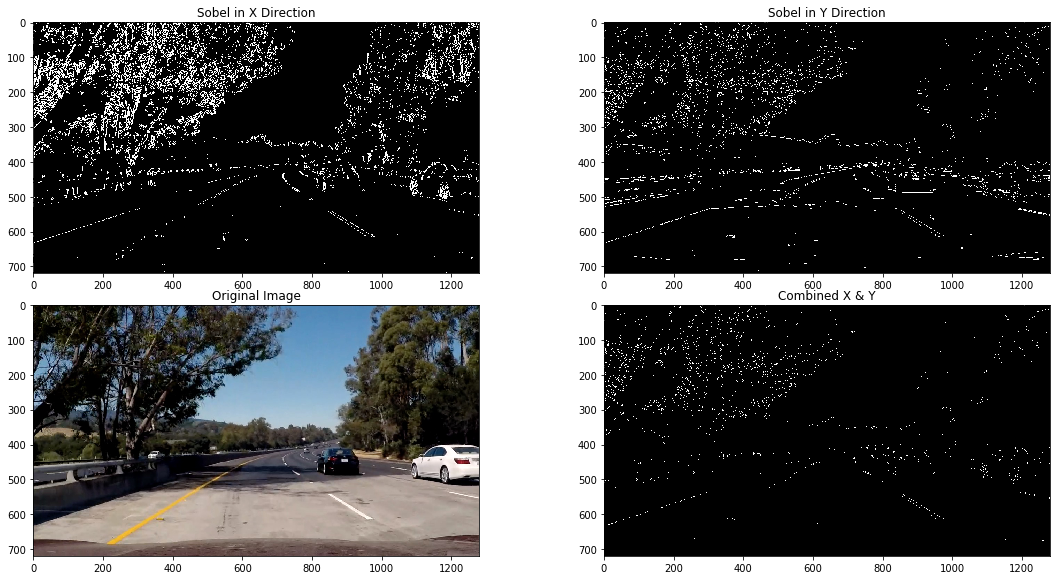

In [75]:
ksize = 1
img_s = shadow_img()
# Apply each of the thresholding functions
gradx = abs_sobel_thresh(shadow_img, orient='x', sobel_kernel=ksize, thresh=(45, 130), cvtColor=False)
grady = abs_sobel_thresh(shadow_img, orient='y', sobel_kernel=ksize, thresh=(50, 90), cvtColor=False)

# Combining X & Y Sobels
grad_combined = np.zeros_like(gradx)
grad_combined[(gradx==1) & (grady==1)] = 1

# Show images
f, (ax1, ax2) = plt.subplots(2, 2, figsize=(16, 8))
f.tight_layout()
ax1[0].imshow(gradx, cmap='gray')
ax1[0].set_title('Sobel in X Direction')
ax1[1].imshow(grady, cmap='gray')
ax1[1].set_title('Sobel in Y Direction')
ax2[0].imshow(shadow_img)
ax2[0].set_title('Original Image')
ax2[1].imshow(grad_combined, cmap='gray')
ax2[1].set_title('Combined X & Y')

In [90]:
a = np.linspace(0, 19, 20)
b = np.ones(4)
c = np.convolve(b,a)
print(c, len(c))
np.argmax(np.convolve(b, a))

[  0.   1.   3.   6.  10.  14.  18.  22.  26.  30.  34.  38.  42.  46.  50.
  54.  58.  62.  66.  70.  54.  37.  19.] 23


19